# Problem
According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

Attribute Information
1. id: unique identifier
2. gender: "Male", "Female" or "Other"
3. age: age of the patient
4. hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5. heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6. ever_married: "No" or "Yes"
7. work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8. Residence_type: "Rural" or "Urban"
9. avg_glucose_level: average glucose level in blood
10. bmi: body mass index
11. smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12. stroke: 1 if the patient had a stroke or 0 if not
*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

# Target
Classification for prediction if the patients get ability to stoke or not 

In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [6]:
data_path = '/content/gdrive/MyDrive/healthcare-dataset-stroke-data.csv'
data = pd.read_csv(data_path)
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [7]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [8]:
# Bắt đầu tìm hiểu về các trường dữ liệu
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [9]:
# Tìm hiểu các giá trị của từng trường
data.nunique()

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [10]:
# Tìm hiểu về các giá trị của từng trường dữ liệu là số
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [11]:
# Xem số lượng dữ liệu trống (null)
null_info = pd.DataFrame({'Null count': data.isnull().sum(), 'Null ratio': data.isnull().sum()/len(data)})
null_info.drop('stroke', inplace=True)
null_info.sort_values(by='Null ratio', ascending=False, inplace=True)
null_info

,Null count,Null ratio
bmi,201,0.039335
id,0,0.000000
gender,0,0.000000
age,0,0.000000
hypertension,0,0.000000
heart_disease,0,0.000000
ever_married,0,0.000000
work_type,0,0.000000
Residence_type,0,0.000000
avg_glucose_level,0,0.000000


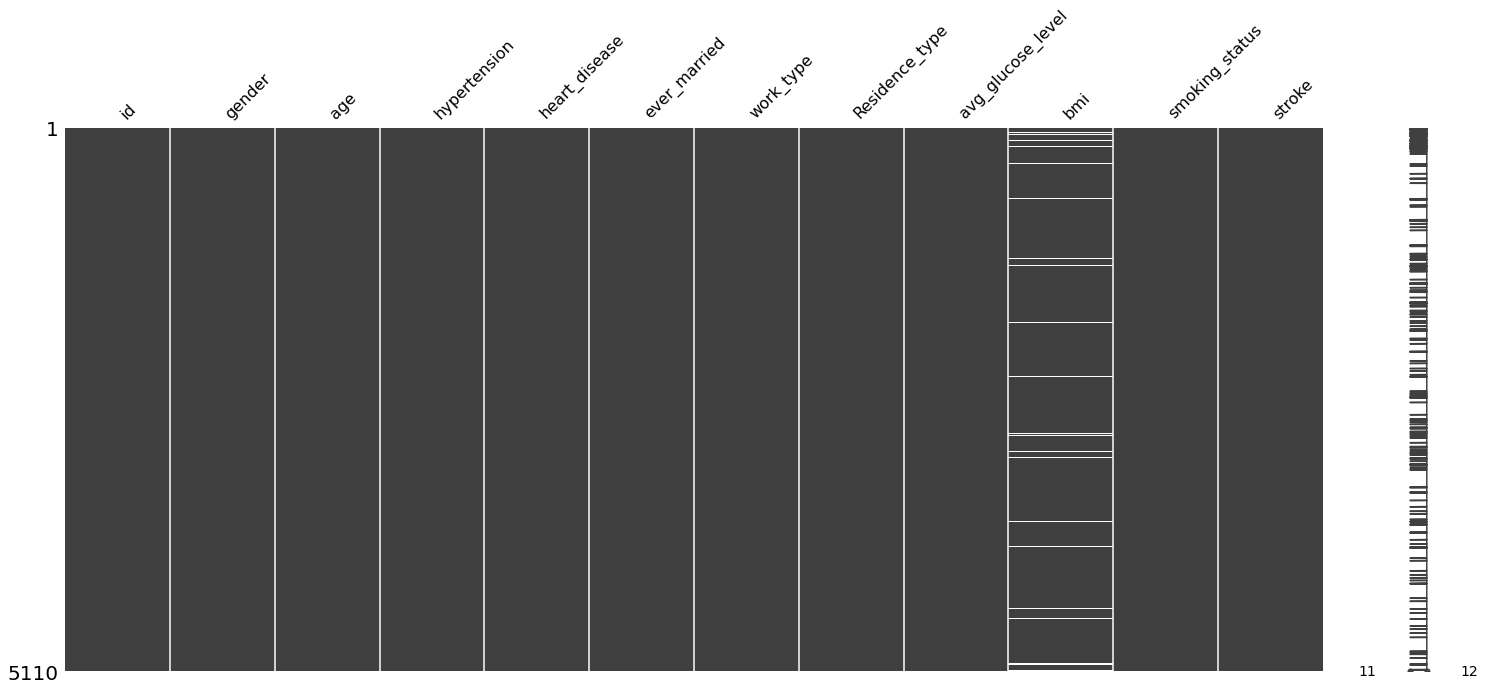

In [12]:
# vẽ biểu diễn null
import missingno as msno

msno.matrix(data);

In [14]:
# Xem tỉ só giữa các trường hợp positive và negative
print('% Negative: {}'.format((data.stroke==0).sum() / len(data) * 100,'.2f'))
print('% Positive: {}'.format((data.stroke==1).sum() / len(data) * 100,'.2f'))

% Negative: 95.12720156555773
% Positive: 4.87279843444227


# Visualization

In [ ]:
# Tạo ra một bản copy của data
data1 = data.copy()
data1.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## gennder

In [ ]:
data1['gender'].value_counts(dropna=False)

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

Text(0.5, 1.0, 'Gender pie chart')

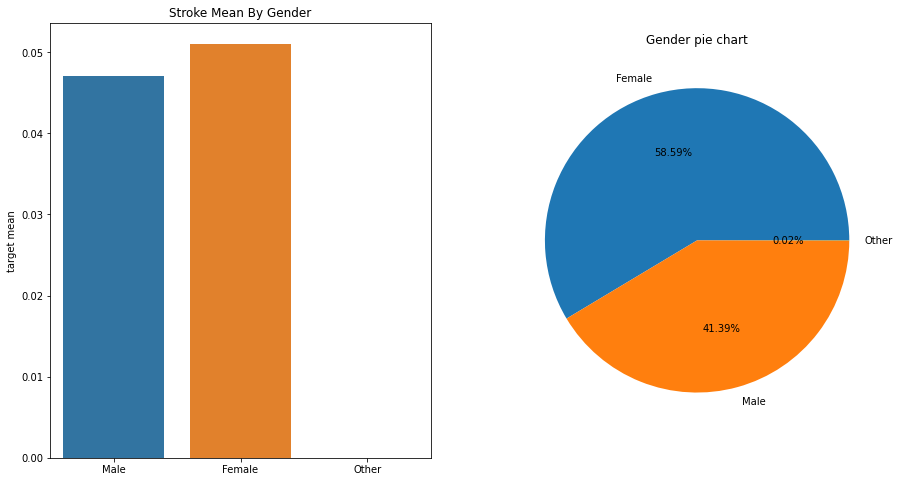

In [ ]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
# tìm mối quan hệ giữa gender và stroke
mean_target_per_gender = data1.groupby('gender', dropna=False)['stroke'].mean()
print(type(mean_target_per_gender))
mean_target_per_gender.index = ['Male', 'Female', 'Other']
sns.barplot(x=mean_target_per_gender.index, y=mean_target_per_gender)
plt.ylabel('target mean')
plt.title('Stroke Mean By Gender')
fig = plt.subplot(1,2,2)
# pie chart 
kinds = ['Female', 'Male', 'Other']
counts = [2994, 2115, 1]
fig.pie(counts, labels = kinds,autopct='%1.2f%%')
plt.title('Gender pie chart')

In [ ]:
# encode data cho gender
gender_list = data1['gender'].unique().tolist()
gender_list.sort()

for idx, value in enumerate(gender_list):
    data1['gender'] = data1['gender'].replace(value, idx)

data1['gender']

0       1
1       0
2       1
3       0
4       0
       ..
5105    0
5106    0
5107    0
5108    1
5109    0
Name: gender, Length: 5110, dtype: int64

## age

In [ ]:
data1['age'].value_counts(dropna=False)

78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
        ... 
1.40       3
0.48       3
0.16       3
0.40       2
0.08       2
Name: age, Length: 104, dtype: int64

Text(0.5, 1.0, 'Boxplot for age')

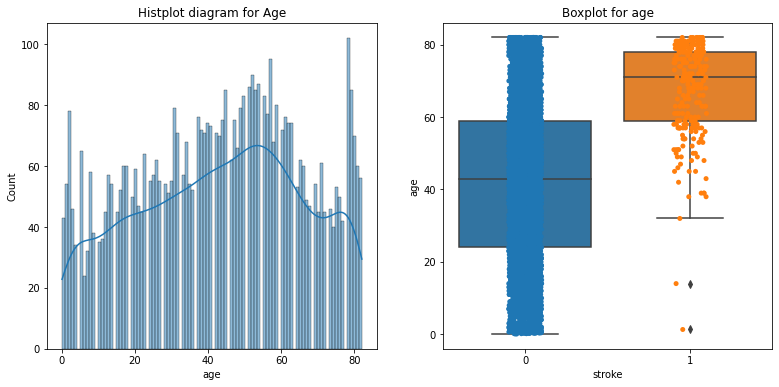

In [ ]:
plt.figure(figsize=(13,6))
plt.subplot(1,2,1)
sns.histplot(data1.age, bins=100, kde=True)
plt.title('Histplot diagram for Age')
plt.subplot(1,2,2)
sns.boxplot(x="stroke", y="age", data=data1)
sns.stripplot(x='stroke',y='age',data=data1,jitter=True,edgecolor='gray')
plt.title('Boxplot for age')

## hypertension

In [ ]:
data1['hypertension'].value_counts(dropna=False)

0    4612
1     498
Name: hypertension, dtype: int64

Text(0.5, 1.0, 'Relationship between pos and neg of stroke by hypertension')

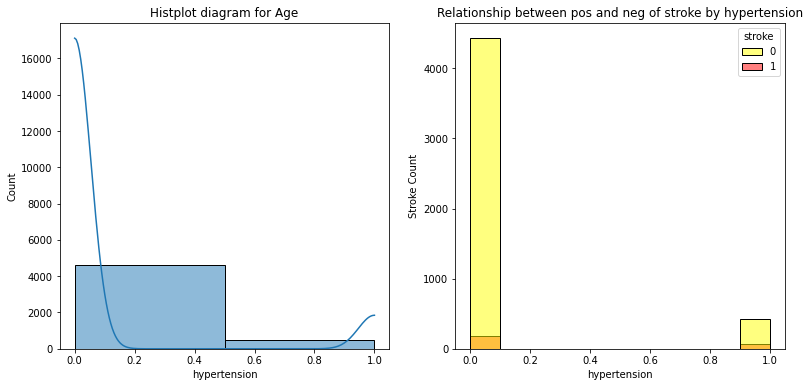

In [ ]:
plt.figure(figsize=(13,6))
plt.subplot(1,2,1)
sns.histplot(data1.hypertension, bins=2, kde=True)
plt.title('Histplot diagram for Age')
plt.subplot(1,2,2)
sns.histplot(data=data1, x='hypertension', hue='stroke',multiple='layer', palette=['yellow', 'red'], bins=10);
plt.ylabel('Stroke Count')
plt.title('Relationship between pos and neg of stroke by hypertension')

## heart_disease

In [ ]:
data1['heart_disease'].value_counts(dropna=False)

0    4834
1     276
Name: heart_disease, dtype: int64

Text(0.5, 1.0, 'Pie Chart for heart_disease')

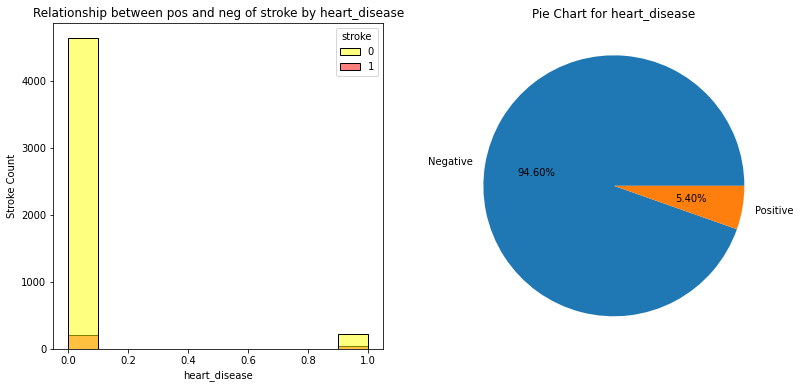

In [ ]:
plt.figure(figsize=(13,6))
plt.subplot(1,2,1)
sns.histplot(data=data1, x='heart_disease', hue='stroke',multiple='layer', palette=['yellow', 'red'], bins=10);
plt.ylabel('Stroke Count')
plt.title('Relationship between pos and neg of stroke by heart_disease')
fig = plt.subplot(1,2,2)
# pie chart 
kinds = ['Negative', 'Positive']
counts = [4834, 276]
fig.pie(counts, labels = kinds,autopct='%1.2f%%')
plt.title('Pie Chart for heart_disease')

## ever_married

In [ ]:
data1['ever_married'].value_counts(dropna=False)

Yes    3353
No     1757
Name: ever_married, dtype: int64

Text(0.5, 1.0, 'ever_married pie chart')

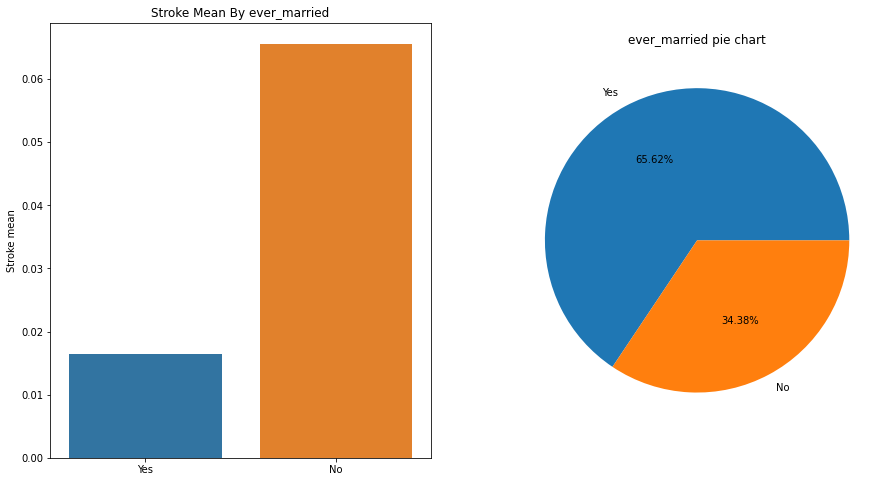

In [ ]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
# tìm mối quan hệ giữa ever_married và stroke
mean_target_per_ever_married = data1.groupby('ever_married', dropna=False)['stroke'].mean()
mean_target_per_ever_married.index = ['Yes', 'No']
sns.barplot(x=mean_target_per_ever_married.index, y=mean_target_per_ever_married)
plt.ylabel('Stroke mean')
plt.title('Stroke Mean By ever_married')
fig = plt.subplot(1,2,2)
# pie chart 
kinds = ['Yes', 'No']
counts = [3353, 1757]
fig.pie(counts, labels = kinds,autopct='%1.2f%%')
plt.title('ever_married pie chart')

In [ ]:
# encode data cho ever_married
ever_married_list = data1['ever_married'].unique().tolist()
ever_married_list.sort()

for idx, value in enumerate(ever_married_list):
    data1['ever_married'] = data1['ever_married'].replace(value, idx)

data1['ever_married']

0       1
1       1
2       1
3       1
4       1
       ..
5105    1
5106    1
5107    1
5108    1
5109    1
Name: ever_married, Length: 5110, dtype: int64

## work_type

In [ ]:
data1['work_type'].value_counts(dropna=False)

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

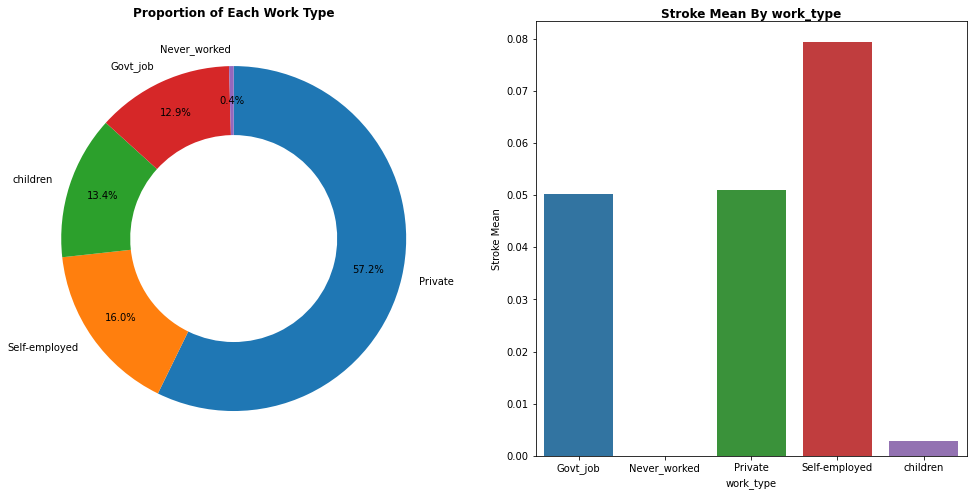

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(17,8))
work_type_count = data1.work_type.value_counts(dropna=False)
ax1.pie(work_type_count,labels=work_type_count.index,startangle=90,counterclock=False,
        wedgeprops={'width':0.4}, autopct = "%1.1f%%", pctdistance=0.80);
ax1.set_title('Proportion of Each Work Type', fontsize=12, fontweight='bold')
# relationship 
mean_stroke_by_work = data1.groupby('work_type', dropna=False).agg({'stroke':np.mean})
sns.barplot(x=mean_stroke_by_work.index, y=mean_stroke_by_work.stroke, ax=ax2)
ax2.set_ylabel('Stroke Mean')
ax2.set_title('Stroke Mean By work_type', fontsize=12, fontweight='bold', pad=0.8);

In [ ]:
# encode data cho work_type
work_type_list = data1['work_type'].unique().tolist()
work_type_list.sort()

for idx, value in enumerate(work_type_list):
    data1['work_type'] = data1['work_type'].replace(value, idx)

data1['work_type']

0       2
1       3
2       2
3       2
4       3
       ..
5105    2
5106    3
5107    3
5108    2
5109    0
Name: work_type, Length: 5110, dtype: int64

## Residence_type

In [ ]:
data1['Residence_type'].value_counts(dropna=False)

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

Text(0.5, 1.0, 'Resident_type pie chart')

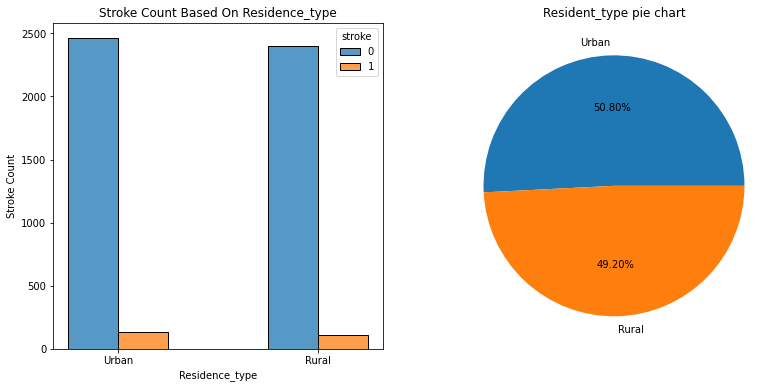

In [ ]:
plt.figure(figsize=(13,6))
plt.subplot(1,2,1)
sns.histplot(data=data1, x='Residence_type', hue='stroke', multiple='dodge',shrink=0.5)
plt.ylabel('Stroke Count')
plt.title('Stroke Count Based On Residence_type')
fig = plt.subplot(1,2,2)
# pie chart 
kinds = ['Urban', 'Rural']
counts = [2596, 2514]
fig.pie(counts, labels = kinds,autopct='%1.2f%%')
plt.title('Resident_type pie chart')

In [ ]:
# encode data cho Residence_type
Residence_type_list = data1['Residence_type'].unique().tolist()
Residence_type_list.sort()

for idx, value in enumerate(Residence_type_list):
    data1['Residence_type'] = data1['Residence_type'].replace(value, idx)

data1['Residence_type']

0       1
1       0
2       0
3       1
4       0
       ..
5105    1
5106    1
5107    0
5108    0
5109    1
Name: Residence_type, Length: 5110, dtype: int64

## avg_glucose_level

In [ ]:
data1['avg_glucose_level'].value_counts(dropna=False)

93.88     6
91.68     5
91.85     5
83.16     5
73.00     5
         ..
111.93    1
94.40     1
95.57     1
66.29     1
85.28     1
Name: avg_glucose_level, Length: 3979, dtype: int64

Text(0.5, 1.0, 'Relationship of pos and neg of stroke for avg_glucose_level')

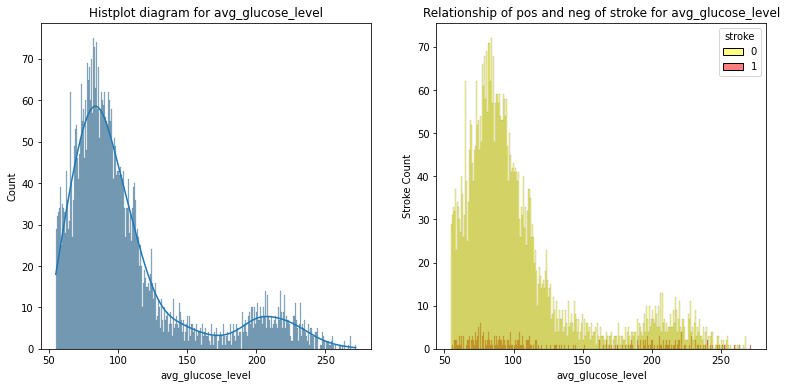

In [ ]:
plt.figure(figsize=(13,6))
plt.subplot(1,2,1)
sns.histplot(data1.avg_glucose_level, bins=300, kde=True)
plt.title('Histplot diagram for avg_glucose_level')
plt.subplot(1,2,2)
sns.histplot(data=data1, x='avg_glucose_level', hue='stroke',multiple='layer',palette=['yellow', 'red'], bins=300);
plt.ylabel('Stroke Count')
plt.title('Relationship of pos and neg of stroke for avg_glucose_level')

## bmi

In [ ]:
data1['bmi'].value_counts(dropna=False)

NaN     201
28.7     41
28.4     38
27.6     37
26.7     37
       ... 
11.5      1
40.6      1
53.9      1
97.6      1
14.9      1
Name: bmi, Length: 419, dtype: int64

Text(0.5, 1.0, 'Violin for bmi')

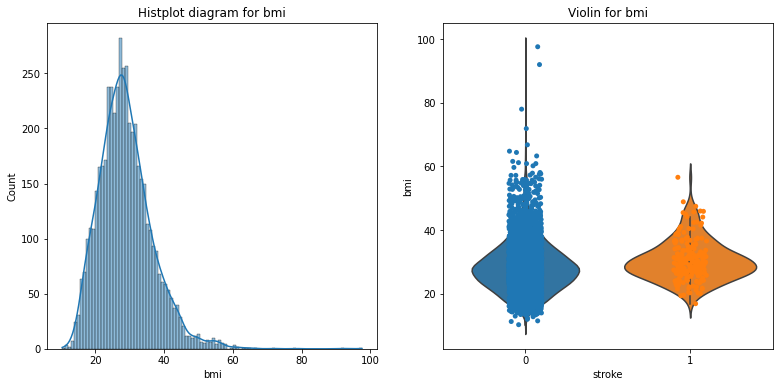

In [ ]:
plt.figure(figsize=(13,6))
plt.subplot(1,2,1)
sns.histplot(data1.bmi, bins=100, kde=True)
plt.title('Histplot diagram for bmi')
plt.subplot(1,2,2)
sns.violinplot(x="stroke", y="bmi", data=data1, size=6)
sns.stripplot(x='stroke',y='bmi',data=data1,jitter=True,edgecolor='gray')
plt.title('Violin for bmi')

## smoking_status

In [ ]:
data1['smoking_status'].value_counts(dropna=False)

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

Text(0.5, 0, 'Stroke Mean')

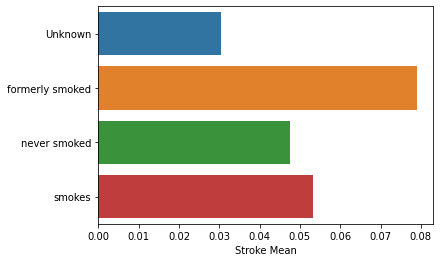

In [ ]:
mean_stroke_by_smoking_status = data1.groupby('smoking_status', dropna=False).agg({'stroke': np.mean})
# edit the index to plot the null part
edited_index = list(mean_stroke_by_smoking_status.index)
# edited_index[5] = 'NaN'
mean_stroke_by_smoking_status.index = edited_index
# plot
sns.barplot(y=mean_stroke_by_smoking_status.index, x=mean_stroke_by_smoking_status.stroke)
plt.xlabel('Stroke Mean')

In [ ]:
# encode data cho smoking_status
smoking_status_list = data1['smoking_status'].unique().tolist()
smoking_status_list.sort()

for idx, value in enumerate(smoking_status_list):
    data1['smoking_status'] = data1['smoking_status'].replace(value, idx)

data1['smoking_status']

0       1
1       2
2       2
3       3
4       2
       ..
5105    2
5106    2
5107    2
5108    1
5109    0
Name: smoking_status, Length: 5110, dtype: int64

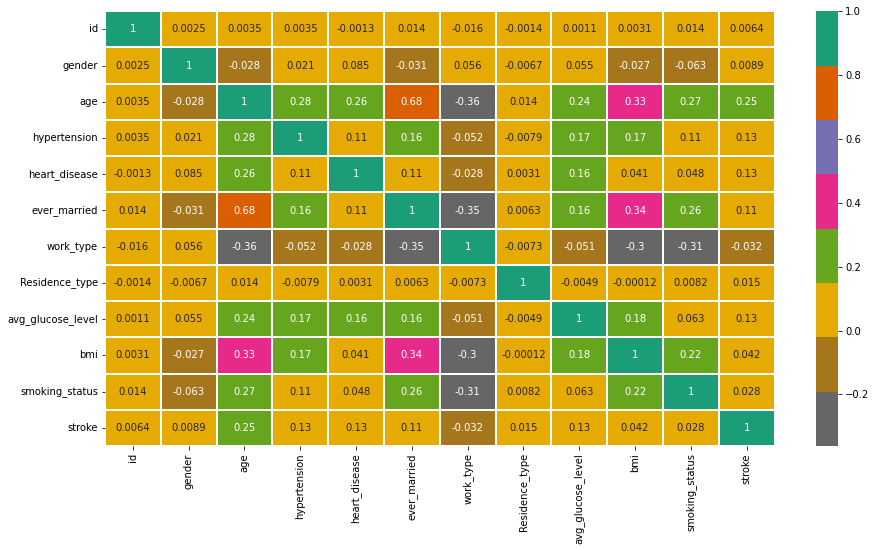

In [ ]:
plt.figure(figsize=(15,8)) 
sns.heatmap(data1.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()

# Summarize

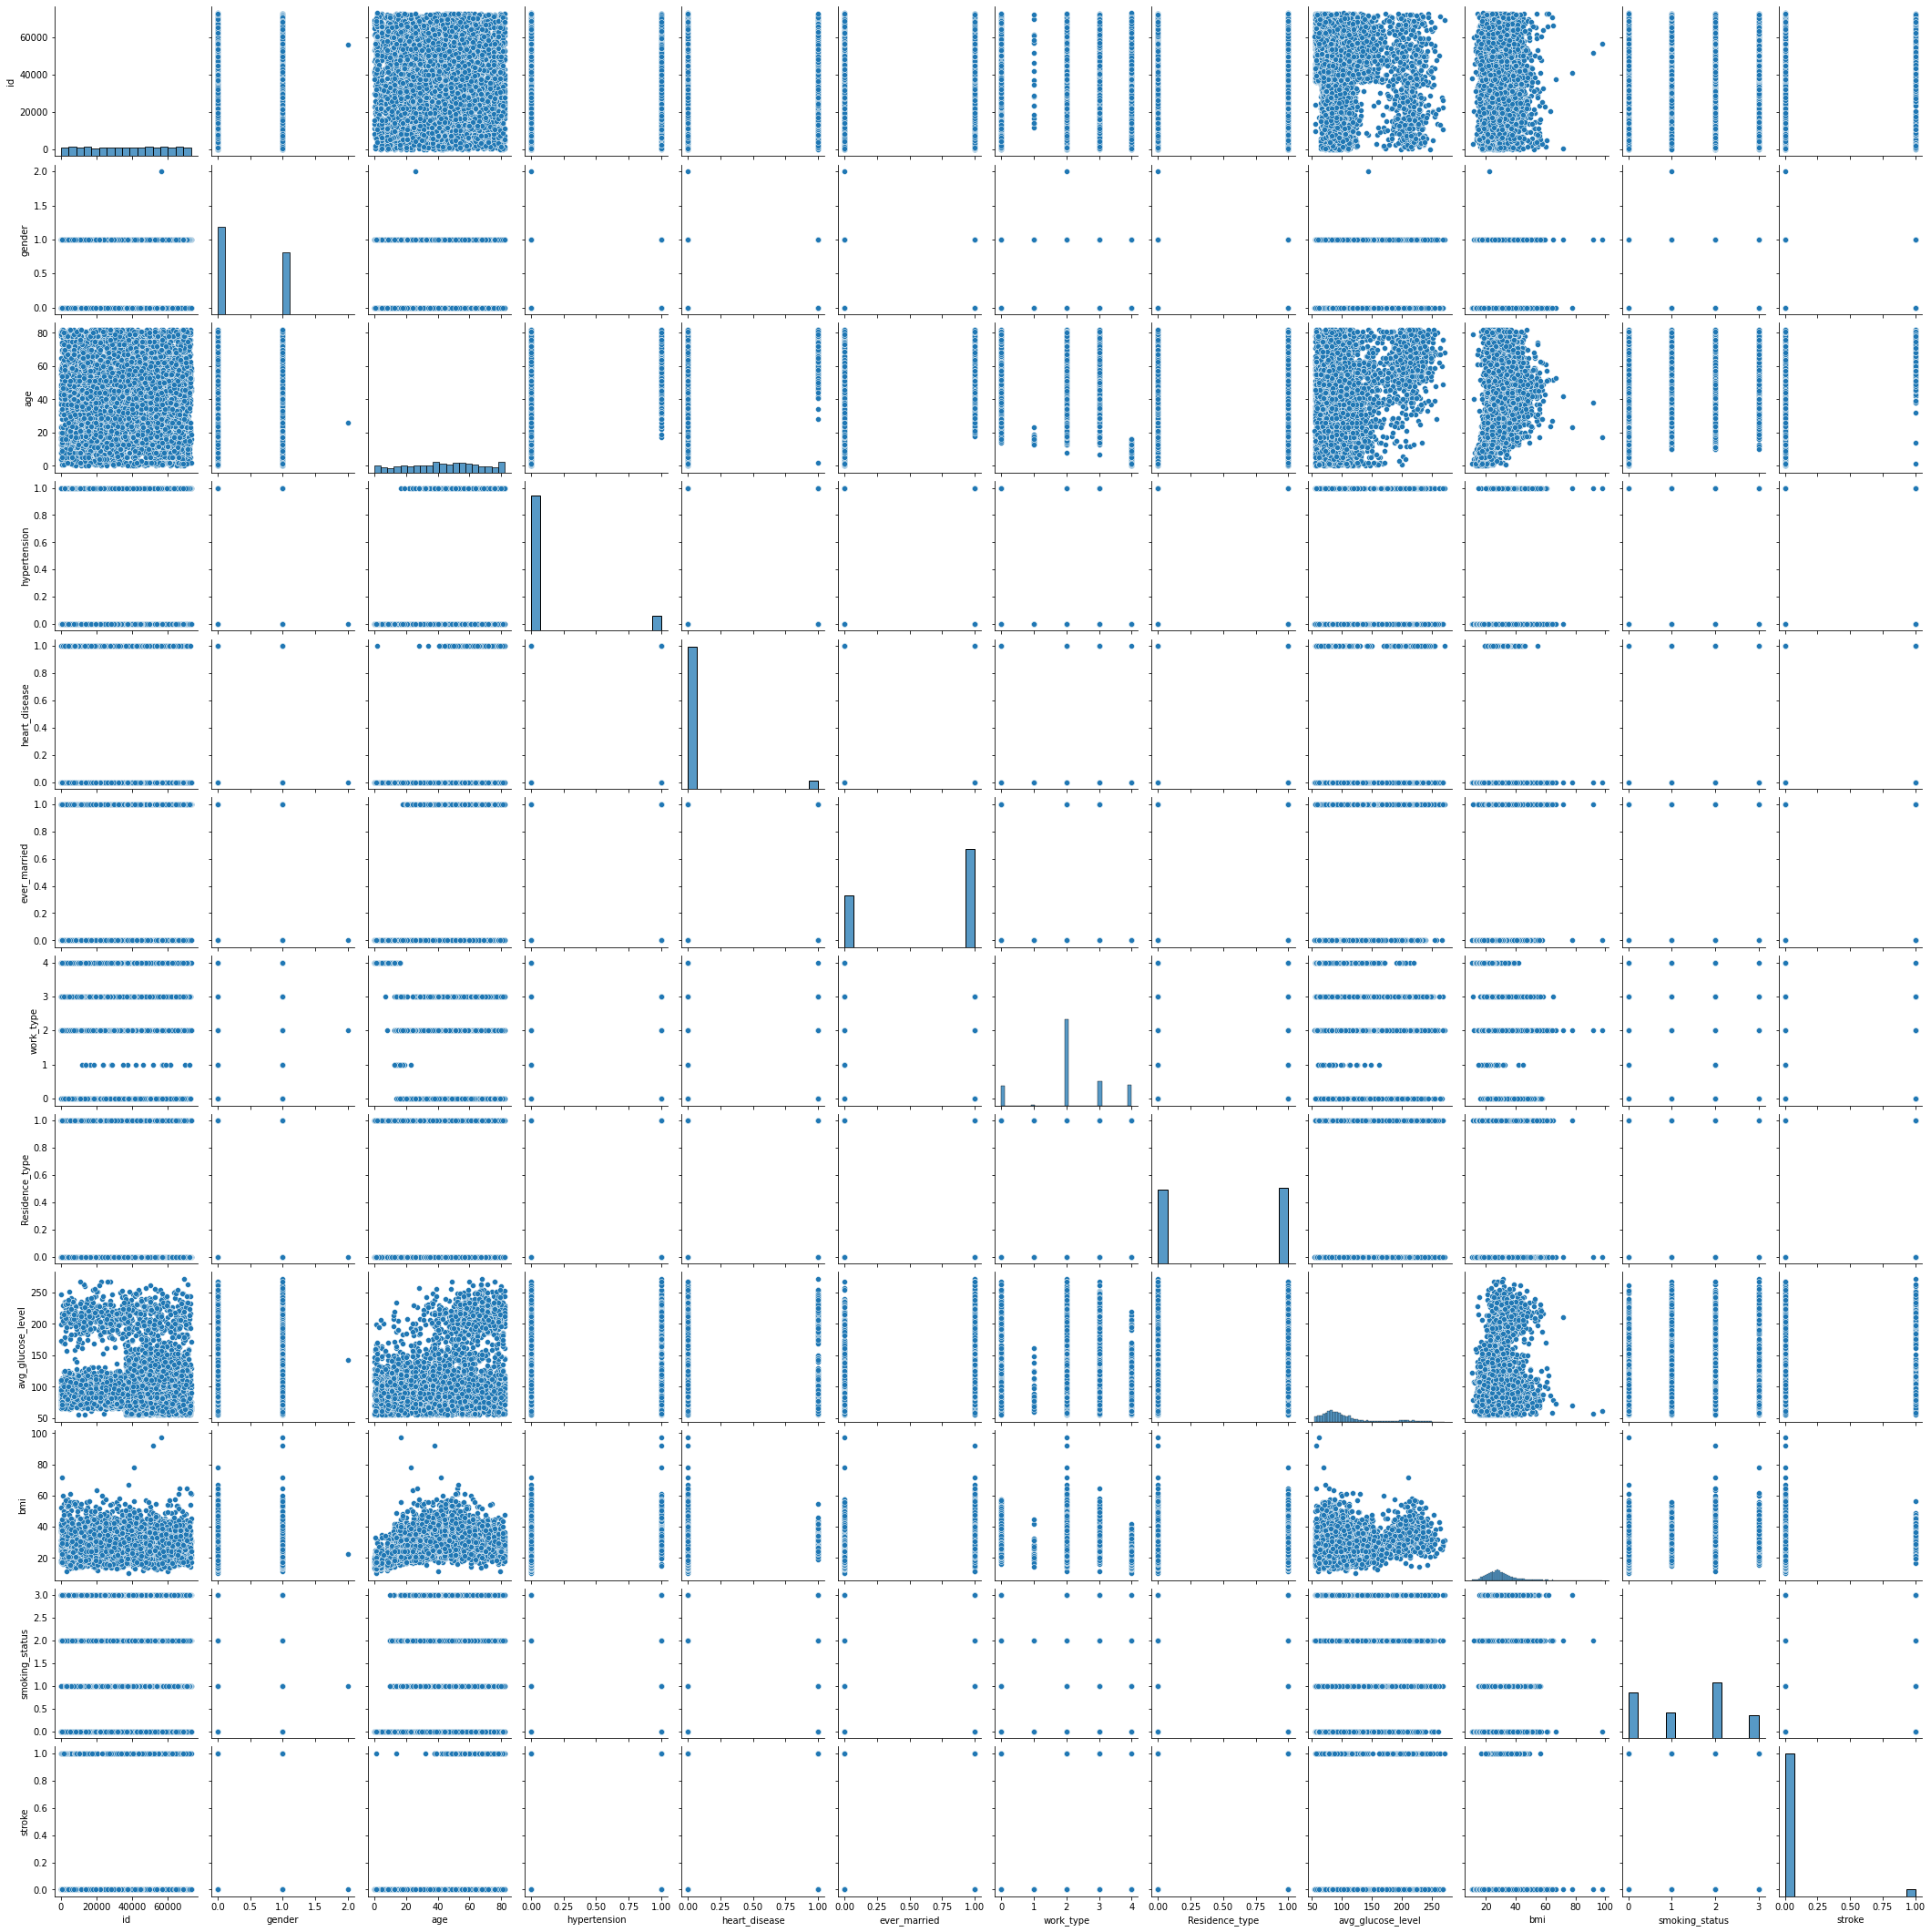

In [ ]:
# biểu đồ so sánh quan hệ giữa các cặp thuộc tính
sns.pairplot(data=data1,kind='scatter')

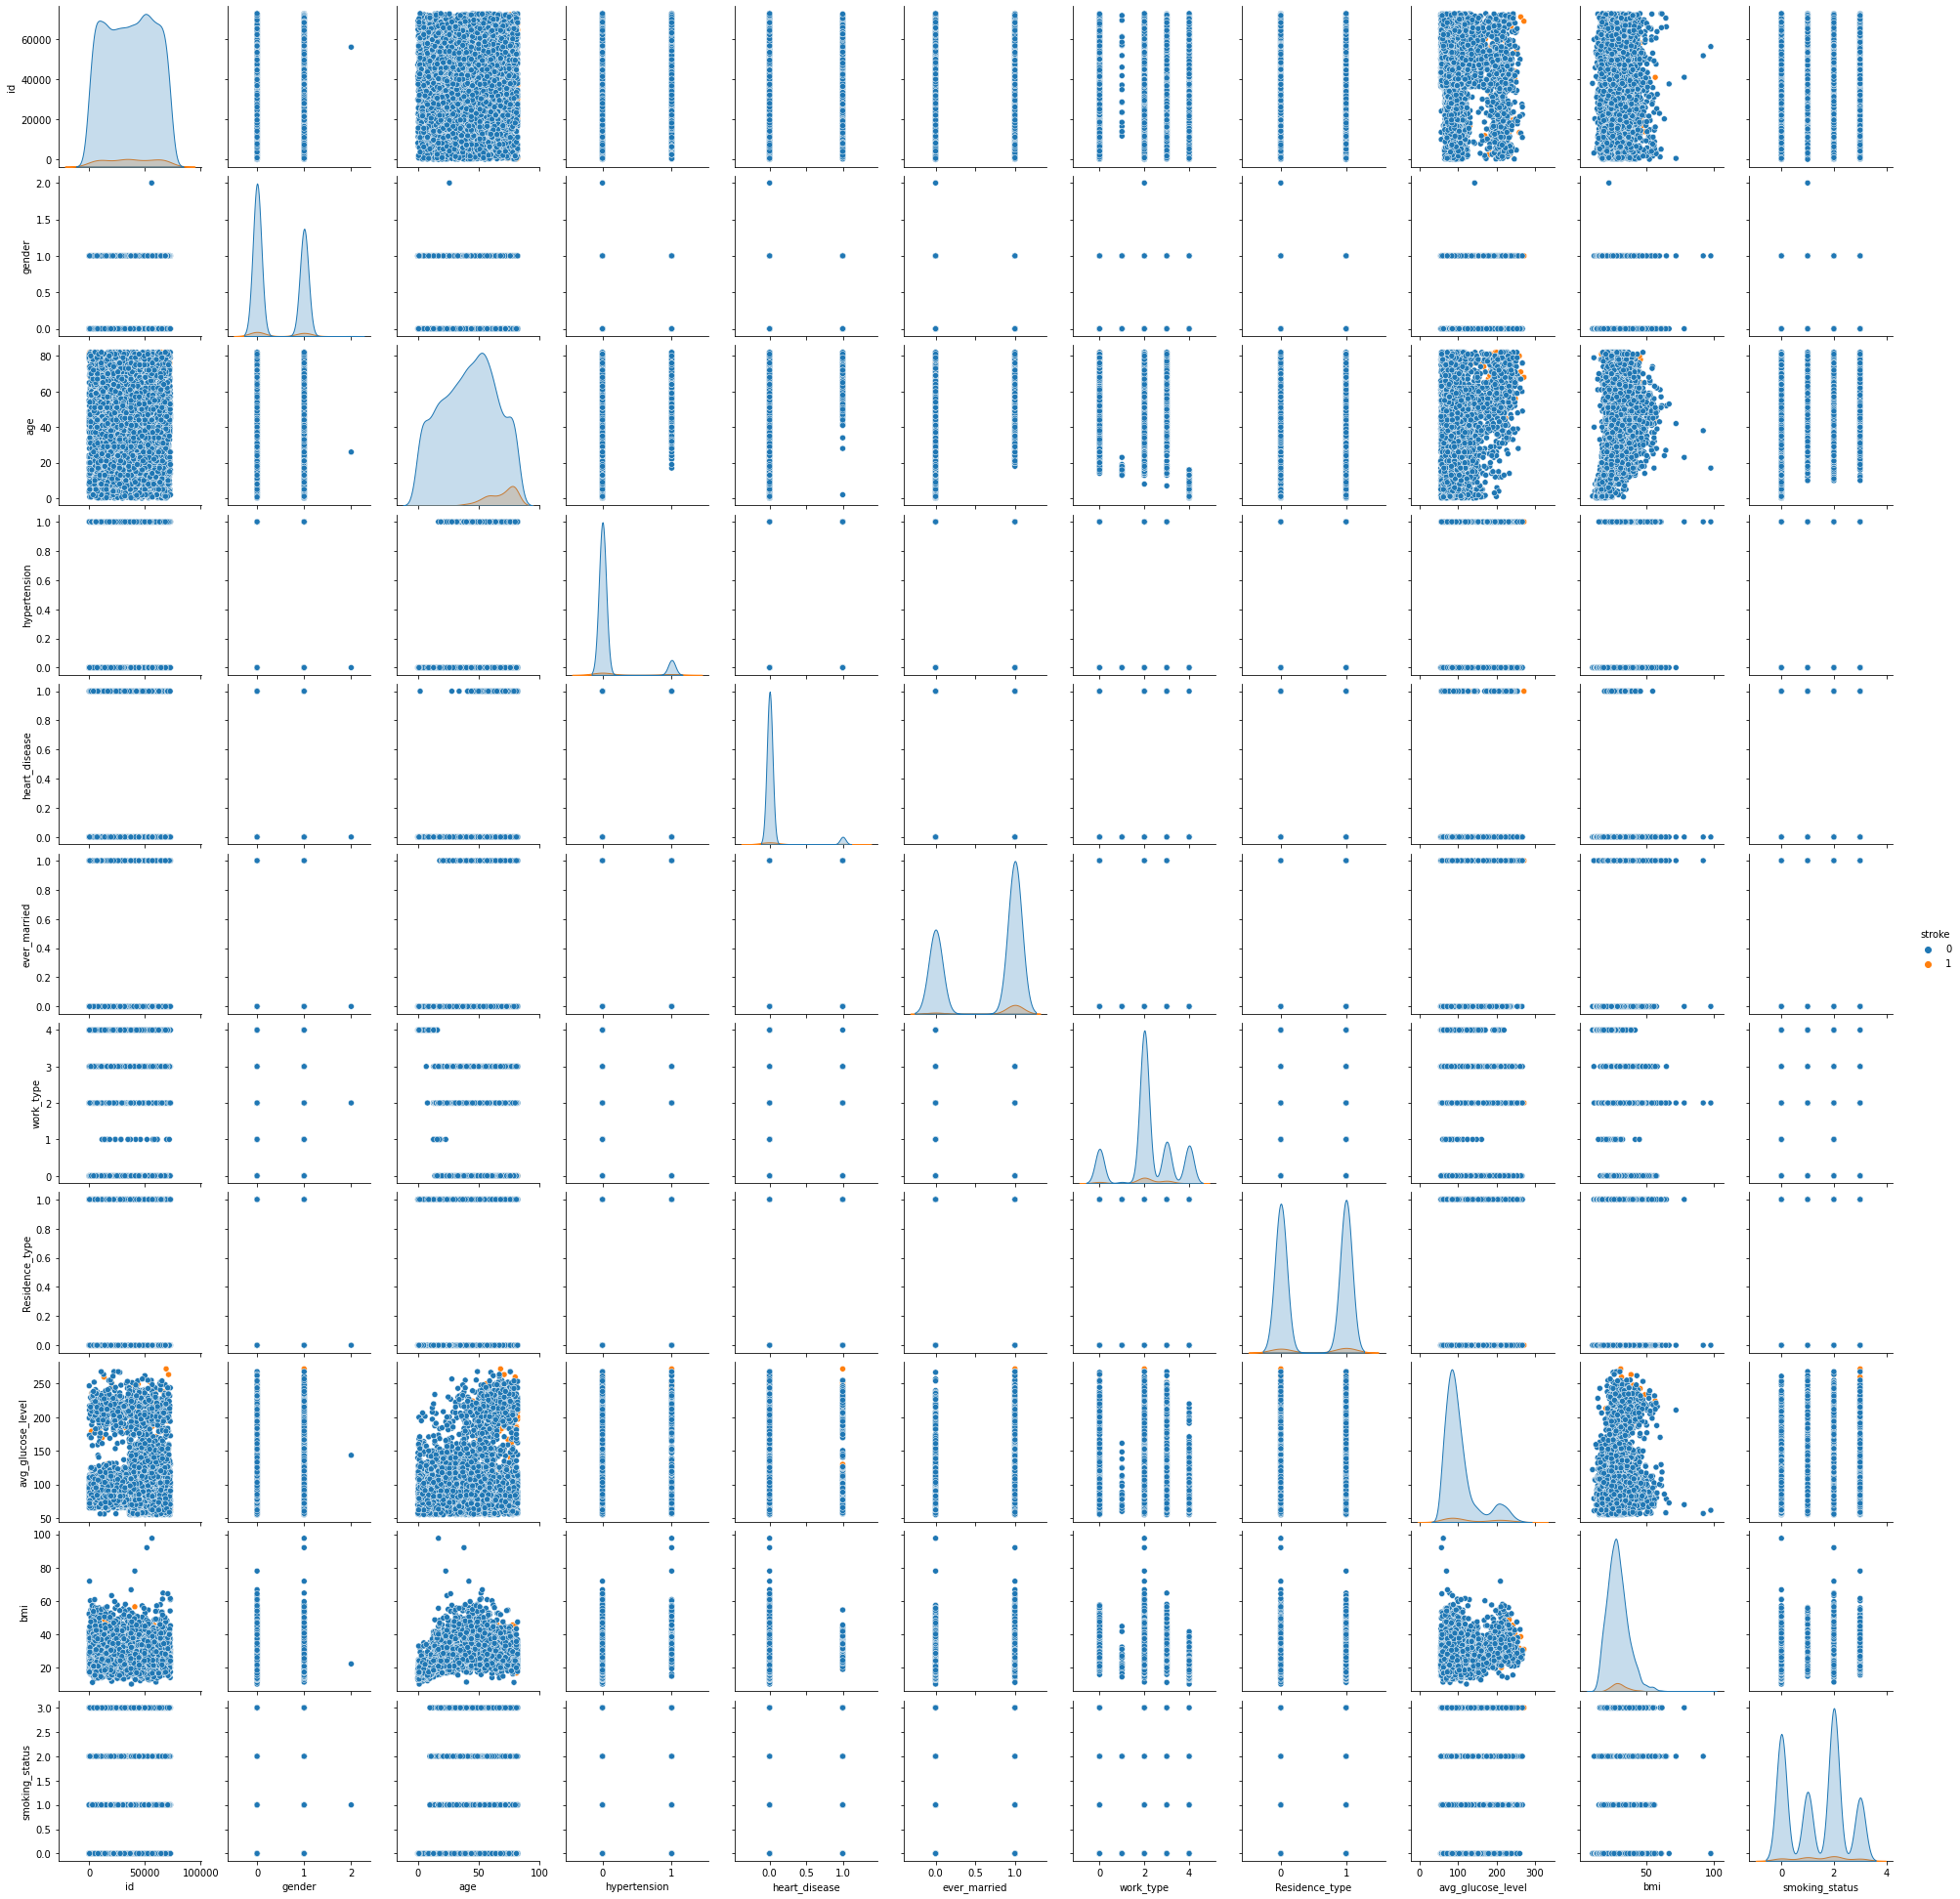

In [ ]:
# biểu đồ so sánh quan hệ giữa các cặp thuộc tính phân chia theo stroke hay không
sns.pairplot(data=data1,hue='stroke');

# Applied Algorithms

In [ ]:
#Metrics
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score
from sklearn.impute import SimpleImputer, KNNImputer

In [ ]:
#Model Selection
from sklearn.model_selection import KFold,train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

In [ ]:
data1.drop(columns="id",inplace=True)

In [ ]:
# tăng số lượng data để giảm chênh lệch
# chia data
X = data1.drop('stroke', axis=1)
y = data1[['stroke']]

from sklearn.preprocessing import StandardScaler
st = StandardScaler()
col= X.columns
X[col] = st.fit_transform(X[col])
X[col]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,-1.298312,1.188073,1.051434,-0.328602,4.185032,0.723884,-0.153836,0.984080,2.706375,0.981345,-0.351781
1,0.716371,-0.840344,0.786070,-0.328602,-0.238947,0.723884,0.763438,-1.016178,2.121559,NaN,0.581552
2,-0.255478,1.188073,1.626390,-0.328602,4.185032,0.723884,-0.153836,-1.016178,-0.005028,0.459269,0.581552
3,1.118363,-0.840344,0.255342,-0.328602,-0.238947,0.723884,-0.153836,0.984080,1.437358,0.701207,1.514885
4,-1.647136,-0.840344,1.582163,3.043196,-0.238947,0.723884,0.763438,-1.016178,1.501184,-0.623083,0.581552
...,...,...,...,...,...,...,...,...,...,...,...
5105,-0.864089,-0.840344,1.626390,3.043196,-0.238947,0.723884,-0.153836,0.984080,-0.494658,NaN,0.581552
5106,0.394863,-0.840344,1.670617,-0.328602,-0.238947,0.723884,0.763438,0.984080,0.420775,1.414286,0.581552
5107,-0.793720,-0.840344,-0.363842,-0.328602,-0.238947,0.723884,0.763438,-1.016178,-0.511443,0.217332,0.581552
5108,0.048497,1.188073,0.343796,-0.328602,-0.238947,0.723884,-0.153836,-1.016178,1.328257,-0.419346,-0.351781


In [ ]:
# chia dữ liệu train và test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
# điền null bắng mean
imputer = SimpleImputer(strategy='median') # median imputation ('mean' for mean and 'most_frequent' for mode imputations)

imputer.fit(X_train) # SimpleImputer() learns the median values from the train data

X_train = imputer.transform(X_train) # replace missing values with medians

X_test = imputer.transform(X_test) # replace missing values with medians

## Naive Bayes

In [ ]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test) 
accuracy_nb=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for Naive Bayes\n',cm)
print('accuracy_Naive Bayes: %.3f' %accuracy)
print('precision_Naive Bayes: %.3f' %precision)
print('recall_Naive Bayes: %.3f' %recall)
print('f1-score_Naive Bayes : %.3f' %f1)

Confusion matrix for Naive Bayes
 [[878  90]
 [ 31  23]]
accuracy_Naive Bayes: 0.882
precision_Naive Bayes: 0.882
recall_Naive Bayes: 0.882
f1-score_Naive Bayes : 0.882


/home/genkibaskervillge/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



## Decision Tree

In [ ]:
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, y_train)  
Y_pred = decision_tree.predict(X_test) 
accuracy_dt=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for DecisionTree\n',cm)
print('accuracy_DecisionTree: %.3f' %accuracy)
print('precision_DecisionTree: %.3f' %precision)
print('recall_DecisionTree: %.3f' %recall)
print('f1-score_DecisionTree : %.3f' %f1)

Confusion matrix for DecisionTree
 [[922  46]
 [ 48   6]]
accuracy_DecisionTree: 0.908
precision_DecisionTree: 0.908
recall_DecisionTree: 0.908
f1-score_DecisionTree : 0.908


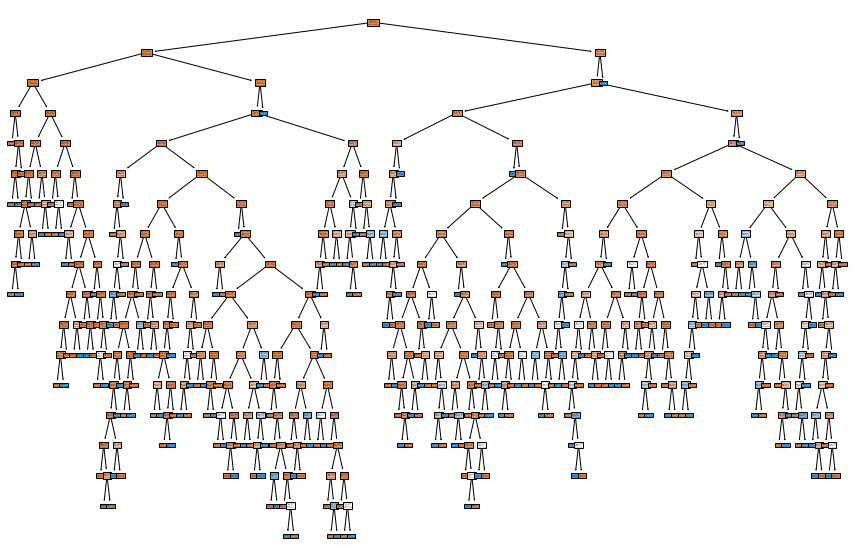

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize = (15,10))
plot_tree(decision_tree.fit(X_train, y_train)  ,filled=True)
plt.show()

## Random Forest

In [ ]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_prediction = random_forest.predict(X_test)
accuracy_rf=round(accuracy_score(y_test,Y_prediction)* 100, 2)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)


cm = confusion_matrix(y_test, Y_prediction)
accuracy = accuracy_score(y_test,Y_prediction)
precision =precision_score(y_test, Y_prediction,average='micro')
recall =  recall_score(y_test, Y_prediction,average='micro')
f1 = f1_score(y_test,Y_prediction,average='micro')
print('Confusion matrix for Random Forest\n',cm)
print('accuracy_random_Forest : %.3f' %accuracy)
print('precision_random_Forest : %.3f' %precision)
print('recall_random_Forest : %.3f' %recall)
print('f1-score_random_Forest : %.3f' %f1)

/tmp/ipykernel_4987/3394972870.py:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Confusion matrix for Random Forest
 [[968   0]
 [ 54   0]]
accuracy_random_Forest : 0.947
precision_random_Forest : 0.947
recall_random_Forest : 0.947
f1-score_random_Forest : 0.947


## KNN

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test) 
accuracy_knn=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for KNN\n',cm)
print('accuracy_KNN : %.3f' %accuracy)
print('precision_KNN : %.3f' %precision)
print('recall_KNN: %.3f' %recall)
print('f1-score_KNN : %.3f' %f1)

/home/genkibaskervillge/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Confusion matrix for KNN
 [[963   5]
 [ 54   0]]
accuracy_KNN : 0.942
precision_KNN : 0.942
recall_KNN: 0.942
f1-score_KNN : 0.942


/tmp/ipykernel_4987/204222719.py:4: DeprecationWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.

/home/genkibaskervillge/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/home/genkibaskervillge/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/home/genkibaskervillge/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/home/genkibaskervillg

/home/genkibaskervillge/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/home/genkibaskervillge/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/home/genkibaskervillge/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/home/genkibaskervillge/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

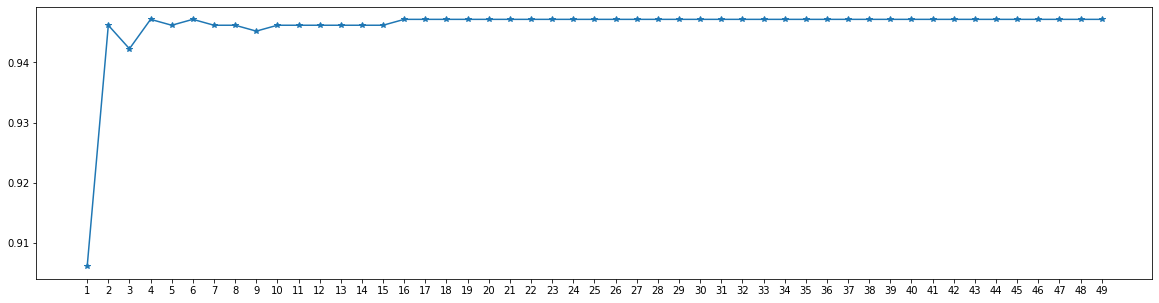

In [ ]:
# Với nhiều giá trị của n
plt.subplots(figsize=(20,5))
a_index=list(range(1,50))
a=pd.Series()
x=range(1,50)
#x=[1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,50)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(X_train, y_train) 
    prediction=model.predict(X_test)
    a=a.append(pd.Series(accuracy_score(y_test,prediction)))
plt.plot(a_index, a,marker="*")
plt.xticks(x)
plt.show()

## MLP

In [ ]:
MLP = MLPClassifier(hidden_layer_sizes=150, random_state=3, max_iter=200)
MLP.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test) 
accuracy_MLP=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_MLP = round(MLP.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for Multi Layer Perceptron\n',cm)
print('accuracy_Multi Layer Perceptron: %.3f' %accuracy)
print('precision_Multi Layer Perceptron: %.3f' %precision)
print('recall_Multi Layer Perceptron: %.3f' %recall)
print('f1-score_Multi Layer Perceptron : %.3f' %f1)

/home/genkibaskervillge/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Confusion matrix for Multi Layer Perceptron
 [[878  90]
 [ 31  23]]
accuracy_Multi Layer Perceptron: 0.882
precision_Multi Layer Perceptron: 0.882
recall_Multi Layer Perceptron: 0.882
f1-score_Multi Layer Perceptron : 0.882


/home/genkibaskervillge/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



## SVM

In [ ]:
linear_svc = LinearSVC(max_iter=4000)
linear_svc.fit(X_train, y_train)
Y_pred = linear_svc.predict(X_test)
accuracy_svc=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_linear_svc = round(linear_svc.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for SVC\n',cm)
print('accuracy_SVC: %.3f' %accuracy)
print('precision_SVC: %.3f' %precision)
print('recall_SVC: %.3f' %recall)
print('f1-score_SVC : %.3f' %f1)

Confusion matrix for SVC
 [[968   0]
 [ 54   0]]
accuracy_SVC: 0.947
precision_SVC: 0.947
recall_SVC: 0.947
f1-score_SVC : 0.947


/home/genkibaskervillge/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



# Find Best Model

In [ ]:
results = pd.DataFrame({
    'Model': [ 'KNN', 
              'Random Forest',
              'Naive Bayes',  
              ' Support Vector Machine',
              'Multi Layer Perceptron',
              'Decision Tree'],
    'Score': [ acc_knn, 
              acc_random_forest,
              acc_gaussian,  
              acc_linear_svc,
              acc_MLP,
              acc_decision_tree],
    "Accuracy_score":[accuracy_knn,
                      accuracy_rf,
                      accuracy_nb,
                      accuracy_svc,
                      accuracy_MLP,
                      accuracy_dt
                     ]})
result_df = results.sort_values(by='Accuracy_score', ascending=False)
result_df = result_df.reset_index(drop=True)
result_df.head(9)

,Model,Score,Accuracy_score
0,Random Forest,100.00,94.72
1,Support Vector Machine,95.23,94.72
2,KNN,95.82,94.23
3,Decision Tree,100.00,90.80
4,Naive Bayes,87.18,88.16
5,Multi Layer Perceptron,96.06,88.16


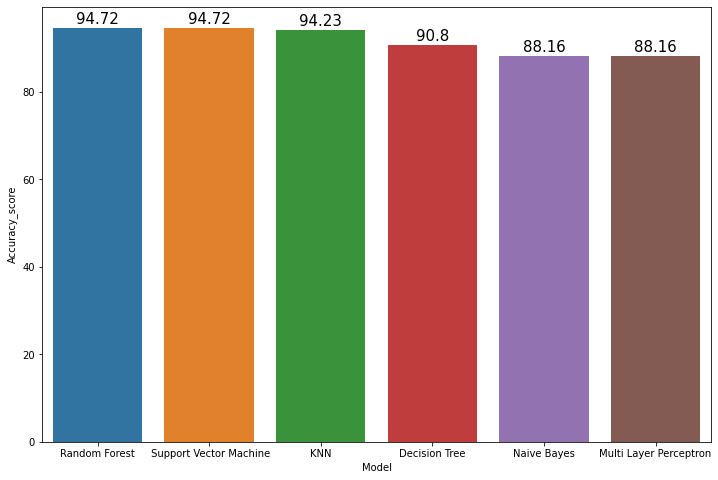

In [ ]:
plt.subplots(figsize=(12,8))
ax=sns.barplot(x='Model',y="Accuracy_score",data=result_df)
labels = (result_df["Accuracy_score"])
# add result numbers on barchart
for i, v in enumerate(labels):
    ax.text(i, v+1, str(v), horizontalalignment = 'center', size = 15, color = 'black')